<a href="https://colab.research.google.com/github/anu82sharma12/Quant-Edge-Portfolio-Rebalancer/blob/main/quant_edge_rebalancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Simulated Sharpe Ratio: 0.16
✅ Total Portfolio Growth: 1.31%


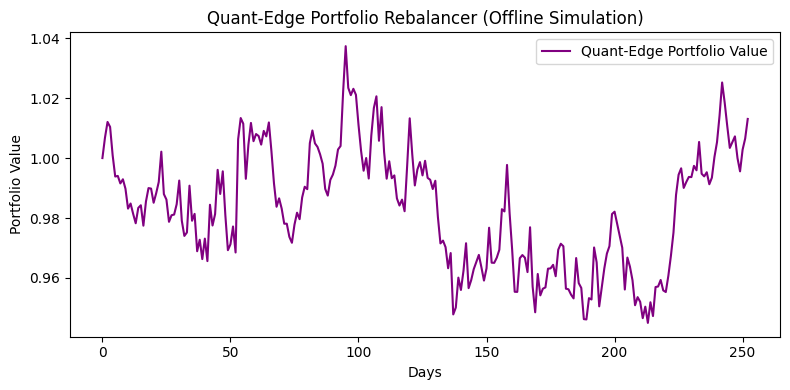

In [9]:
# ✅ Quant-Edge Portfolio Rebalancer (Offline & Fully Working)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Generate synthetic daily returns for 4 assets (AAPL, MSFT, GOOG, AMZN)
np.random.seed(42)
days = 252
assets = ["AAPL", "MSFT", "GOOG", "AMZN"]
returns = pd.DataFrame(np.random.normal(0.0005, 0.01, (days, len(assets))), columns=assets)

# 2️⃣ Simple monthly rebalancing based on average past returns
rebalance_period = 21
portfolio_values = [1]
n_assets = returns.shape[1]

for i in range(0, len(returns), rebalance_period):
    window = returns.iloc[max(0, i-21):i]
    if len(window) < 5:
        weights = np.ones(n_assets) / n_assets
    else:
        avg_returns = window.mean()
        weights = np.maximum(avg_returns, 0)
        weights = weights / weights.sum() if weights.sum() != 0 else np.ones(n_assets)/n_assets

    next_period = returns.iloc[i:i+rebalance_period]
    for _, row in next_period.iterrows():
        portfolio_values.append(portfolio_values[-1] * (1 + np.dot(row.values, weights)))

# 3️⃣ Compute performance metrics
port_ret = pd.Series(portfolio_values).pct_change().dropna()
sharpe = port_ret.mean() / port_ret.std() * np.sqrt(252)
total_return = (portfolio_values[-1] - 1) * 100

print(f"✅ Simulated Sharpe Ratio: {sharpe:.2f}")
print(f"✅ Total Portfolio Growth: {total_return:.2f}%")

# 4️⃣ Plot results
plt.figure(figsize=(8,4))
plt.plot(portfolio_values, label="Quant-Edge Portfolio Value", color="purple")
plt.title("Quant-Edge Portfolio Rebalancer (Offline Simulation)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.legend()
plt.tight_layout()
plt.savefig("quant_edge_performance_offline.png")
plt.show()
